## GF180MCU - simple CS

### Disable auto-scrolling

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Simulation

In [4]:
%%writefile .spiceinit
set ngbehavior=hs
set ng_nomodcheck
set color0=white
set color1=black
set xbrushwidth=2

Overwriting .spiceinit


In [8]:
%%writefile netlist_cs.spice
* cs_gf180
* common source amplifier using gf180 technology
*
* 180 nm BSIM4.5 (level 54)
*
* AD/AS = 'W*2*HDIF'
* PD/PS = '2*W+2*HDIF+2*HDIF' ; 4 sided perimeter

** spice models 
.include "/Users/talarico/share/openmpw/pdk_gf180/gf180mcuC/libs.tech/ngspice/design.ngspice"
.lib "/Users/talarico/share/openmpw/pdk_gf180/gf180mcuC/libs.tech/ngspice/sm141064.ngspice" typical

** options
* HSPICE compatibility mode set in .spiceinit
.option nomod post
* .options dccap=1 accurate ; makes no difference

** general parameters
.global gnd

** temperature
.TEMP 27
** hspice  default TNOM=25
** ngspice default TNOM=27
** eldo    default TNOM=27
** spectre default TNOM=27

** transistor geometrical dimensions
.param L1    = 0.28u
.param width = 37.2u

** netlist
VD dd gnd DC 1.8
RL dd dn 1k
CL dn gnd 200f
Vsrc in gnd DC 940m AC 1
Rsrc in gn 200k
xmn dn gn 0 0 nfet_03v3 L='L1' W='width' 
+ AD={width*0.24u} AS={width*0.24u} 
+ PD={2*(width + 0.24u)} PS={2*(width + 0.24u)}

.op  ; running analysis outside .control provide more "detailed" info

.control
op
print @m.xmn.m0[vgs] @m.xmn.m0[vds] @m.xmn.m0[vbs] @m.xmn.m0[vth] 
+ @m.xmn.m0[id] @m.xmn.m0[gm] @m.xmn.m0[gds]
+ @m.xmn.m0[cgs] 
+ @m.xmn.m0[csg] 
+ @m.xmn.m0[cgd] 
+ @m.xmn.m0[cdg] 
+ @m.xmn.m0[cgb]
+ @m.xmn.m0[cbg]
+ @m.xmn.m0[csd]
+ @m.xmn.m0[cds] 
+ @m.xmn.m0[cbd] 
+ @m.xmn.m0[cdb]
+ @m.xmn.m0[cbs]
+ @m.xmn.m0[csb]
+ @m.xmn.m0[cgg] @m.xmn.m0[cdd] @m.xmn.m0[css]
+ @m.xmn.m0[capbd] @m.xmn.m0[capbs]
echo ""
*let CBD = @mn1[capbd] + @mn1[cbg]
*let CBS = @mn1[capbs] + @mn1[cbg]
*let CGD  = @mn1[cgg]/2
*let CGS  = 'CGD - @mn1[cgs]'
let CGS = @m.xmn.m0[cgs] 
let CSG = @m.xmn.m0[csg] 
let CGD = @m.xmn.m0[cgd] 
let CDG = @m.xmn.m0[cdg] 
let CBG = @m.xmn.m0[cbg]
let CGB = @m.xmn.m0[cgb]
let CDS = @m.xmn.m0[cds]
let CSD = @m.xmn.m0[csd]
let CBD = @m.xmn.m0[cbd]
let CDB = @m.xmn.m0[cdb]
let CBS = @m.xmn.m0[cbs]
let CSB = @m.xmn.m0[csb]
let CGG = @m.xmn.m0[cgg]
let CDD = @m.xmn.m0[cdd]
let CSS = @m.xmn.m0[css]
let CAPBD = @m.xmn.m0[capbd]
let CAPBS = @m.xmn.m0[capbs]

echo "printing caps using NGSPICE naming convention"
print CGS
print CSG
print CGD
print CDG
print CBG
print CGB
print CDS
print CSD
print CBD
print CDB
print CBS
print CSB
print CGG
print CDD
print CSS
print CAPBD
print CAPBS
echo ""

write ./spiceout/cs_gf180_op.raw 
+ @m.xmn.m0[vgs] @m.xmn.m0[vds] @m.xmn.m0[vbs] 
+ @m.xmn.m0[vth] @m.xmn.m0[id]
+ @m.xmn.m0[gm] @m.xmn.m0[gds]


pz dn 0 in 0 vol pz * output-nodes input-nodes vol|curr type-analysis 
                    * vol|curr (cur stands for a transfer function of
                    * the type (output voltage)/(input current) while
                    * vol stands for a transfer function of the type 
                    * (output voltage)/(input voltage)
                    * type-analysis can be pole|zero|pz
print all

ac dec 100 10 10Gig
meas ac dc_gain find vm(dn) at=10
let dc_gain_db = 20*log10(dc_gain)
let gain3db = dc_gain/sqrt(2)
let gain_3db = dc_gain_db-3
meas ac f3db when vm(dn)=gain3db ;don't do algebra on the meas!
meas ac f_3db when vdb(dn)=gain_3db
echo ""
print dc_gain
print dc_gain_db
print f3db
print f_3db
echo ""
write ./spiceout/cs_gf180_ac.raw v(in) v(dn)
.endc

.end

Overwriting netlist_cs.spice


In [9]:
!ngspice -b netlist_cs.spice


Note: Compatibility modes selected: hs



Circuit: * cs_gf180

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 1
@m.xmn.m0[vgs] = 9.400000e-01
@m.xmn.m0[vds] = 8.790685e-01
@m.xmn.m0[vbs] = 0.000000e+00
@m.xmn.m0[vth] = 6.393570e-01
@m.xmn.m0[id] = 9.209315e-04
@m.xmn.m0[gm] = 4.602256e-03
@m.xmn.m0[gds] = 1.903075e-04
@m.xmn.m0[cgs] = -2.05567e-14
@m.xmn.m0[csg] = -1.21911e-14
@m.xmn.m0[cgd] = 3.446195e-16
@m.xmn.m0[cdg] = -8.14737e-15
@m.xmn.m0[cgb] = -4.50382e-15
@m.xmn.m0[cbg] = -4.37742e-15
@m.xmn.m0[csd] = -2.59655e-16
@m.xmn.m0[cds] = 1.013412e-14
@m.xmn.m0[cbd] = 7.300370e-17
@m.xmn.m0[cdb] = -1.82878e-15
@m.xmn.m0[cbs] = -4.76433e-15
@m.xmn.m0[csb] = -2.73615e-15
@m.xmn.m0[cgg] = 2.471589e-14
@m.xmn.m0[cdd] = -1.57968e-16
@m.xmn.m0[css] = 1.518690e-14
@m.xmn.m0[capbd] = 2.954411e-14
@m.xmn.m0[capbs] = 3.689579e-14

printing caps using NGSPICE naming convention
cgs = -2.05567e-14
csg = -1.21911e-14
cgd = 3.446195e-16
cdg = -8.14737e-15
cbg = -4.377

### Read and process the simulation data with matlab

In [2]:
% author: C. Talarico
% file: postprocess_cs_gf180.m
    
clearvars; close all; clc;
addpath('../../HspiceToolbox');
x = loadsig('./spiceout/cs_gf180_ac.raw')
lssig(x)
freq = evalsig(x,'FREQUENCY');
vout = evalsig(x, 'dn');
vin = evalsig(x, 'in');
mag = abs(vout);
a0 = max(mag);
phase = (180/pi)*unwrap(angle(vout));
magdb = 20*log10(mag);
% Gain and BW
gain = max(magdb);
f3db = 1e-6*interp1(magdb, freq, magdb(1)-3, 'spline');
% alternative computation
% idx = find(magdb < gain - 3, 1, 'first');
% f_3db = 1e-6*freq(idx)

fprintf('Simulation Results\n');
fprintf('------------------\n');
fprintf('The ampl. has DC gain %.2f (%.2f dB) and BW %.2f (MHz)\n', ...
a0, gain, f3db);


*********************************************************
               Hspice Toolbox for Matlab
 written by Michael Perrott (http://www-mtl.mit.edu/~perrott)
   while at Silicon Laboratories (http://www.silabs.com)
     Copyright (C) 1999 by Silicon Laboratories, Inc.
     This software is distributed under the terms of
       the GNU Public License (see the COPYING file
  for more details), and comes with no warranty or support
*********************************************************



x = 3x1 struct array with fields:
    name
    data

ans = 3x11 char array
    '1:FREQUENCY'
    '2:in       '
    '3:dn       '

Simulation Results
------------------
The ampl. has DC gain 3.87 (11.75 dB) and BW 8.41 (MHz)


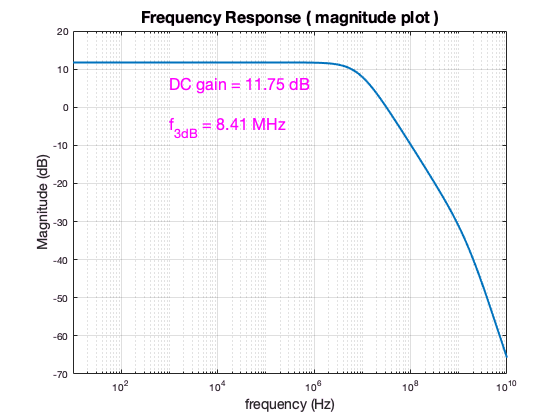

In [4]:
% Plots
figure(1);
semilogx(freq,magdb,'linewidth',2);
grid;
xlabel('frequency (Hz)','fontsize',14);
ylabel('Magnitude (dB)','fontsize',14);
xlim([10 1e10])
title('Frequency Response ( magnitude plot )', 'fontsize', 16);
% annotate the plot
str1 = sprintf('DC gain = %.2f dB\n', gain);
str2 = sprintf('f_{3dB} = %.2f MHz', f3db);
str = {str1, str2};
text(1e3,0, str,'color','m','fontsize',16)
% phase plot (just in case)
% figure(2);
% semilogx(freq,phase,'linewidth',2);
% grid;
% xlabel('frequency (Hz)','fontsize',14);
% ylabel('Phase (degrees)','fontsize',14);
% xlim([10 1e10])
% ylim ([-50 200])
% title('Frequency Response ( phase plot )', 'fontsize', 16);
% print(figure(1), '-dpsc', 'Plot_CS_ee214.ps');
% print(figure(2), '-append', '-dpsc', 'Plot_CS_ee214.ps');

In [4]:
% estimate the poles and zeros from the simulation data
np = 2;
nz = 1;
data = frd(vout,freq);
sys = tfest(data,np,nz) % System Identification Toolbox
[p,z] = pzmap(sys);     % Control Toolbox
np = length(p); %number of poles
nz = length(z); %number of zeros
fprintf('\nThe T.F. has %d poles and %d zeros', np, nz)
if np >= 1
    for i=1:np
        fprintf('\nThe pole(s) are at P(%d): %.4f + %.4fj (GHz)',i, ...
        real(p(i)*1e-9), imag(p(i)*1e-9));
    end
end
if nz >= 1
    for i=1:nz
        fprintf('\nThe zero(s) are at Z(%d): %.4f + %.4fj (GHz)',i, ...
        real(z(i)*1e-9), imag(z(i)*1e-9));
    end
end

% poles and zeros from extracted TF
fz_meas = real(z(1));
fp1_meas = -real(p(2));
fp2_meas = -real(p(1));


sys =
 
     1.382e06 s - 5.034e16
  ---------------------------
  s^2 + 1.552e09 s + 1.302e16
 
Continuous-time identified transfer function.

Parameterization:
   Number of poles: 2   Number of zeros: 1
   Number of free coefficients: 4
   Use "tfdata", "getpvec", "getcov" for parameters and their uncertainties.

Status:                                                 
Estimated using TFEST on frequency response data "data".
Fit to estimation data: 100%                            
FPE: 2.296e-21, MSE: 2.275e-21                          

The T.F. has 2 poles and 1 zeros
The pole(s) are at P(1): -1.5436 + 0.0000j (GHz)
The pole(s) are at P(2): -0.0084 + 0.0000j (GHz)
The zero(s) are at Z(1): 36.4307 + 0.0000j (GHz)

In [5]:
fprintf('\n\n')
% double checking DC gain and BW from the extracted TF
A0 = dcgain(sys);
A0dB = db(A0);
fb = bandwidth(sys);
fprintf('Results extracted from TF\n');
fprintf('---------------------------------------------------------\n');
fprintf('The ampl. has DC gain %.2f (%.2f dB) and BW %.2f (MHz)\n', ...
A0, A0dB, fb*1e-6);
fprintf('Zeros and poles are (Hz): \nfz = %.2e, \nfp1 = %.2e, \nfp2 = %.2e\n',...
    fz_meas, fp1_meas, fp2_meas);




Results extracted from TF
---------------------------------------------------------
The ampl. has DC gain -3.87 (11.75 dB) and BW 8.41 (MHz)
Zeros and poles are (Hz): 
fz = 3.64e+10, 
fp1 = 8.43e+06, 
fp2 = 1.54e+09


In [7]:
% reverse engineering the T.F.
y = loadsig('./spiceout/cs_gf180_op.raw')
lssig(y)

% 
gm = evalsig(y,'m_xmn_m0_gm');
gds = evalsig(y, 'm_xmn_m0_gm');
CL  = 200e-15;   % spec (spice netlist)
RL  = 1e3;       % spec (spice netlist)
Ri  = 200e3;     % spec (spice nerlist) - resistance's voltage source 
Ro = (1/RL + gds)^-1;

% simplification: assume Cdb is negligible compared to CL
Co = CL;

% estimate Cgd from extracted TF
Cgd_meas = gm/2/pi/fz_meas;
% estimate Cgs from extracted TF
% using ZVTC and assuming one pole is dominant
% Formula: b1 = Cgd*Ro + Co*Ro + Ri*Cgs + Ri*(1+gmRo)
b1 = 1/(2*pi*fp1_meas);
Cgs_meas = (b1 - Cgd_meas*Ro - Co*Ro - Ri*Cgd_meas*(1+gm*Ro))/Ri;

fprintf('\nDeriving Cgd and Cgs from the extracted TF \n');
fprintf('----------------------------------------------\n');
fprintf('Cgd = %.2e, Cgs = %.2e \n', Cgd_meas, Cgs_meas);

% derive fp2 from extracted caps
Ci = Cgs_meas; % computed 
b2 = Ri*Ro*(Ci*Co + Ci*Cgd_meas + Co*Cgd_meas);
fp2_re = b1/b2/2/pi;
fprintf('fp2 (from Cgd, Cgs, and CL) = %.2e\n', fp2_re);

y = 8x1 struct array with fields:
    name
    data

ans = 8x14 char array
    '1:VOLTAGE     '
    '2:m_xmn_m0_vgs'
    '3:m_xmn_m0_vds'
    '4:m_xmn_m0_vbs'
    '5:m_xmn_m0_vth'
    '6:m_xmn_m0_id '
    '7:m_xmn_m0_gm '
    '8:m_xmn_m0_gds'


Deriving Cgd and Cgs from the extracted TF 
----------------------------------------------
Cgd = 2.01e-14, Cgs = 5.75e-14 
fp2 (from Cgd, Cgs, and CL) = 5.04e+09


In [8]:
%
% what if the fz extracted from the TF is OFF ? Use Cgd from spice
%
Cgd_spice = 8.20122e-15;
fz_spice  = gm/Cgd_spice/2/pi;
b1 = 1/(2*pi*fp1_meas); % arbitrary decision: assume dominant pole is ~ OK
Cgs_spice = (b1 - Cgd_spice*Ro - Co*Ro - Ri*Cgd_spice*(1+gm*Ro))/Ri;

Ci = Cgs_spice; % computed 
b2 = Ri*Ro*(Ci*Co + Ci*Cgd_spice + Co*Cgd_spice);
fp2_spice = b1/b2/2/pi;
fp1_spice = 1/2/pi/(Ri*(Ci + Cgd_spice*(1+gm*Ro)));


fprintf('\n---------------------------------------------\n');
fprintf('What if the zero extracted from the TF is OFF?\n');
fprintf('----------------------------------------------\n');

fprintf('\nGetting Cgd from spice and compute Cgs and fz and fp2\n');
fprintf('------------------------------------------------------\n');
fprintf(' Cgd = %.2e, Cgs = %.2e \n', Cgd_spice, Cgs_spice);
fprintf(' fz = %.2e (Hz) \n',  fz_spice);
fprintf(' fp1 = %.2e (Hz) \n', fp1_spice);
fprintf(' fp2 = %.2e (Hz) \n', fp2_spice);

Cgs_claudio =  1.22990e-14 + 2.04755e-14;
Ci = Cgs_claudio; % computed 
b2 = Ri*Ro*(Ci*Co + Ci*Cgd_spice + Co*Cgd_spice);
fp2_claudio = b1/b2/2/pi;
fprintf('\n Random numbers\n');
fprintf('------------------------------------------------------\n');
fprintf(' Cgd = %.2e, Cgs = %.2e \n', Cgd_spice, Cgs_claudio);
fprintf(' fz = %.2e (Hz) \n',  fz_spice);
fprintf(' fp1 = %.2e (Hz) \n', fp1_spice);
fprintf(' fp2 = %.2e (Hz) \n', fp2_claudio);


---------------------------------------------
What if the zero extracted from the TF is OFF?
----------------------------------------------

Getting Cgd from spice and compute Cgs and fz and fp2
------------------------------------------------------
 Cgd = 8.20e-15, Cgs = 7.92e-14 
 fz = 8.93e+10 (Hz) 
 fp1 = 8.45e+06 (Hz) 
 fp2 = 4.64e+09 (Hz) 

 Random numbers
------------------------------------------------------
 Cgd = 8.20e-15, Cgs = 3.28e-14 
 fz = 8.93e+10 (Hz) 
 fp1 = 8.45e+06 (Hz) 
 fp2 = 9.94e+09 (Hz) 
